In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import os
import pandas as pd

In [2]:
!which pip

/home/samirj/miniconda3/envs/gendis/bin/pip


In [3]:
!pip freeze | grep GENDIS

GENDIS==1.0.13


In [4]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import SubgroupDistance

In except import


/home/samirj/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
error_df = pd.read_csv('data/gunpoint_processed_error.csv')

In [6]:
error_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,truth,clf_pred,clf_prob,error
0,-1.054014,-1.050717,-1.047666,-1.047448,-1.048769,-1.047781,-1.047891,-1.047536,-1.047369,-1.044656,...,-1.071325,-1.068112,-1.068966,-1.069154,-1.066642,-1.064798,1,1,0.920254,0.079746
1,-0.966288,-0.971525,-0.971881,-0.972672,-0.966935,-0.966532,-0.967584,-0.966147,-0.966501,-0.966086,...,-1.009584,-1.011476,-1.010935,-1.008073,-1.009745,-1.006283,1,1,0.927635,0.072365
2,-0.693911,-0.690750,-0.683657,-0.676097,-0.675943,-0.674141,-0.671976,-0.670974,-0.670276,-0.670103,...,-0.591039,-0.590049,-0.588937,-0.586893,-0.586506,-0.589174,2,2,0.095378,0.095378


In [7]:
X_train = error_df.drop(columns=['truth', 'clf_pred', 'clf_prob', 'error'])
y_train = error_df['error']

In [8]:
y_train.describe()

count    66.000000
mean      0.244938
std       0.194964
min       0.000008
25%       0.104760
50%       0.195218
75%       0.367542
max       0.734978
Name: error, dtype: float64

In [9]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [10]:
fitness_func = SubgroupDistance(
    distance_function=SubgroupDistance.wasserstein_distance, 
    shapelet_dist_threshold=1.0
)

args = {
    "fitness": fitness_func,
    "population_size": 50, 
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 5,
    "wait": 20, 
    "max_len": 30,
    "n_jobs": multiprocessing.cpu_count() - 2,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'population_size': 50,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 6,
 'normed': False,
 '_min_length': 0,
 'max_len': 30,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'is_fitted': False,
 'fitness': <gendis.fitness.SubgroupDistance at 0x7fc1019651d0>,
 'label_mapping': {},
 'shapelets': []}

In [12]:
%%time
gendis.fit(X_train, y_train.values)

it		avg		std		max		time
1		0.0872		0.062		0.171788	1.0668
2		0.1306		0.047		0.171788	1.8974
3		0.141		0.047		0.171788	2.4742
4		0.1548		0.037		0.172907	3.0495
5		0.1661		0.011		0.172907	3.2621
6		0.1671		0.019		0.172907	3.1266
7		0.1672		0.019		0.172907	3.3525
8		0.1619		0.034		0.172907	3.8116
9		0.1598		0.035		0.172907	4.3736
10		0.1632		0.03		0.172907	5.8238
11		0.1576		0.039		0.172907	5.6931
12		0.1648		0.027		0.172907	5.0675
13		0.1687		0.022		0.172907	6.4843
14		0.1648		0.026		0.172907	4.6742
15		0.155		0.038		0.172907	4.5069
16		0.1412		0.048		0.172907	4.4124
17		0.1574		0.031		0.172907	4.562
18		0.1606		0.028		0.172907	5.7777
19		0.1504		0.04		0.172907	5.3524
20		0.1569		0.032		0.172907	4.8948
21		0.1631		0.022		0.172907	4.4935
22		0.149		0.037		0.172907	4.3175
23		0.1555		0.036		0.172907	5.5529
CPU times: user 21 s, sys: 195 ms, total: 21.2 s
Wall time: 1min 48s


In [13]:
gendis.best

{'it': 4,
 'score': 0.17290683334443038,
 'info': {'dist': 0.19251467648168527,
  'subgroup_error_mean': 0.10210046254530009,
  'rest_error_mean': 0.2869487290204534,
  'subgroup_size': 15},
 'shapelets': [array([-0.58971045, -0.55122157, -0.51120065, -0.44503167, -0.34310032,
         -0.20343029, -0.05229112,  0.10347705,  0.26672193,  0.41806662,
          0.55298043,  0.67376046]),
  array([1.18304477, 1.17716522, 1.1717195 , 1.15267895, 1.12887993,
         1.10479743, 1.08105514, 1.04709864, 1.01293744, 0.97306163,
         0.91854064, 0.87780525, 0.82954651, 0.77861606]),
  array([-0.64829471, -0.6533382 , -0.65563746, -0.65583705, -0.65138246,
         -0.64784339, -0.64125616]),
  array([-0.61876657, -0.62884563, -0.63758018, -0.64178127, -0.63617017,
         -0.62400912, -0.59869621, -0.58402688, -0.56760071, -0.55841123,
         -0.53031039, -0.4886851 , -0.43014372, -0.35365126, -0.1720348 ]),
  array([1.24092497, 1.23780168, 1.2423039 , 1.23686655, 1.23257103,
         1

In [14]:
gendis.top_10_best

[{'score': 0.17290683334443038,
  'info': {'dist': 0.19251467648168527,
   'subgroup_error_mean': 0.10210046254530009,
   'rest_error_mean': 0.2869487290204534,
   'subgroup_size': 15},
  'shapelets': [array([-0.61353932, -0.60710891, -0.59826437, -0.5779627 , -0.5397969 ,
          -0.48670969, -0.42326735, -0.3644603 , -0.30253474, -0.24837615,
          -0.1882963 , -0.12481129]),
   array([1.24073391, 1.23685122, 1.24281856, 1.23696745, 1.22909707,
          1.23210056, 1.23598553, 1.23049149, 1.22897972, 1.2292653 ,
          1.21826267, 1.2182563 , 1.21669961, 1.21373838])]},
 {'score': 0.17290683334443038,
  'info': {'dist': 0.19251467648168527,
   'subgroup_error_mean': 0.10210046254530009,
   'rest_error_mean': 0.2869487290204534,
   'subgroup_size': 15},
  'shapelets': [array([-0.61353932, -0.60710891, -0.59826437, -0.5779627 , -0.5397969 ,
          -0.48670969, -0.42326735, -0.3644603 , -0.30253474, -0.24837615,
          -0.1882963 , -0.12481129]),
   array([1.24073391, 1.

In [15]:
help(gendis.transform)

Help on method transform in module gendis.genetic:

transform(X, shapelets=None) method of gendis.genetic.GeneticExtractor instance
    After fitting the Extractor, we can transform collections of 
    timeseries in matrices with distances to each of the shapelets in
    the evolved shapelet set.
    
    Parameters
    ----------
    X : array-like, shape = [n_ts, ]
        The training input timeseries. Each timeseries must be an array,
        but the lengths can be variable
    
    Returns
    -------
    D : array-like, shape = [n_ts, n_shaps]
        The matrix with distances
    L : array-like, shape = [n_ts, n_shaps]
        The matrix with localization of shapelets



In [16]:
D, L = gendis.transform(X=X_train)

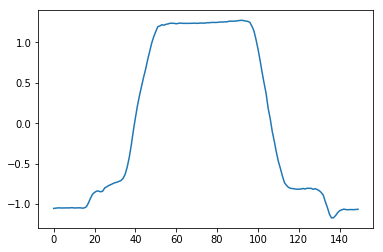

In [17]:
plt.plot(X_train.iloc[0].values)

In [18]:
sg_filter = SubgroupDistance.filter_subgroup_shapelets(
    y_train, D, shapelet_dist_threshold=1.0, return_filter=True
)

In [32]:
X_sg, y_sg = X_train[sg_filter], y_train[sg_filter]
D_sg, L_sg = D[sg_filter], L[sg_filter]

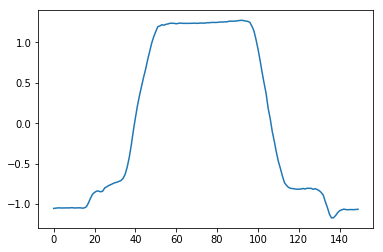

In [20]:
plt.plot(X_sg.iloc[0].values)

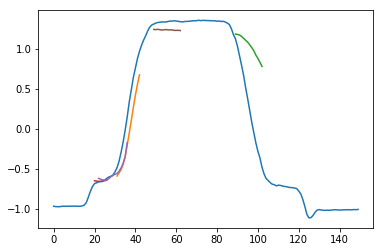

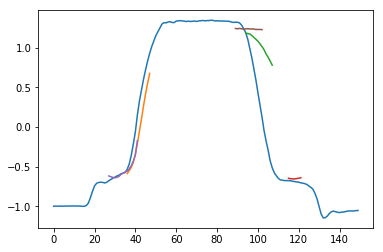

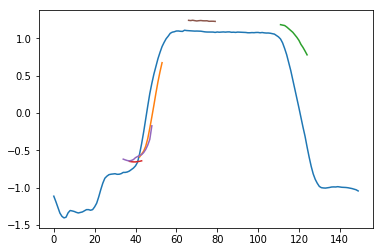

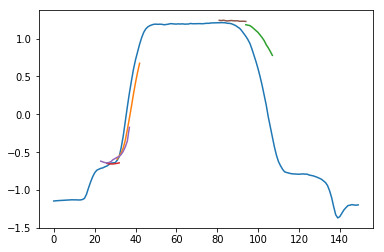

In [45]:
from math import ceil, floor

for series_idx in [1,2,3,4]:
    series = X_sg.iloc[series_idx].values
    plt.plot(series)

    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L_sg[series_idx][shap_idx]
        #shap = gendis.best["shapelets"][shap_idx]

        start = floor(loc * len(series))
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))

        plt.plot(shap_idx, shap)
    
    plt.show()

In [41]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = f'./results/gunpoint/{ts}/'
os.makedirs(folder)
gendis.save(f'{folder}/gendis.pickle')